## Exploratory Data Analisys
Derecha Diario

### Load tokens
"derecha diario" tokens

In [81]:
import pandas as pd
import numpy as np
import pickle

In [82]:
tokens = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

### Tf IDf Scores

#### TfIDf Transformation

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

In [84]:
tfidf_inf = TfidfTransformer().fit_transform(tokens[tokens.topics == 'inflation'].drop('topics', axis=1))

In [85]:
tfidf_inf_df = pd.DataFrame(tfidf_inf.todense(), columns = tokens[tokens.topics == 'inflation'].drop('topics', axis=1).columns)
tfidf_inf_df.shape

(42, 5364)

In [86]:
tfidf_ex = TfidfTransformer().fit_transform(tokens[tokens.topics == 'exchange'].drop('topics', axis=1))

In [87]:
tfidf_ex_df = pd.DataFrame(tfidf_ex.todense(), columns = tokens[tokens.topics == 'exchange'].drop('topics', axis=1).columns)
tfidf_ex_df.shape

(30, 5364)

### Visual Representation
#### Tf IDf per document
See top rated terms per document and their scores

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [89]:
plt.rcParams['figure.figsize'] = [18 , 30]

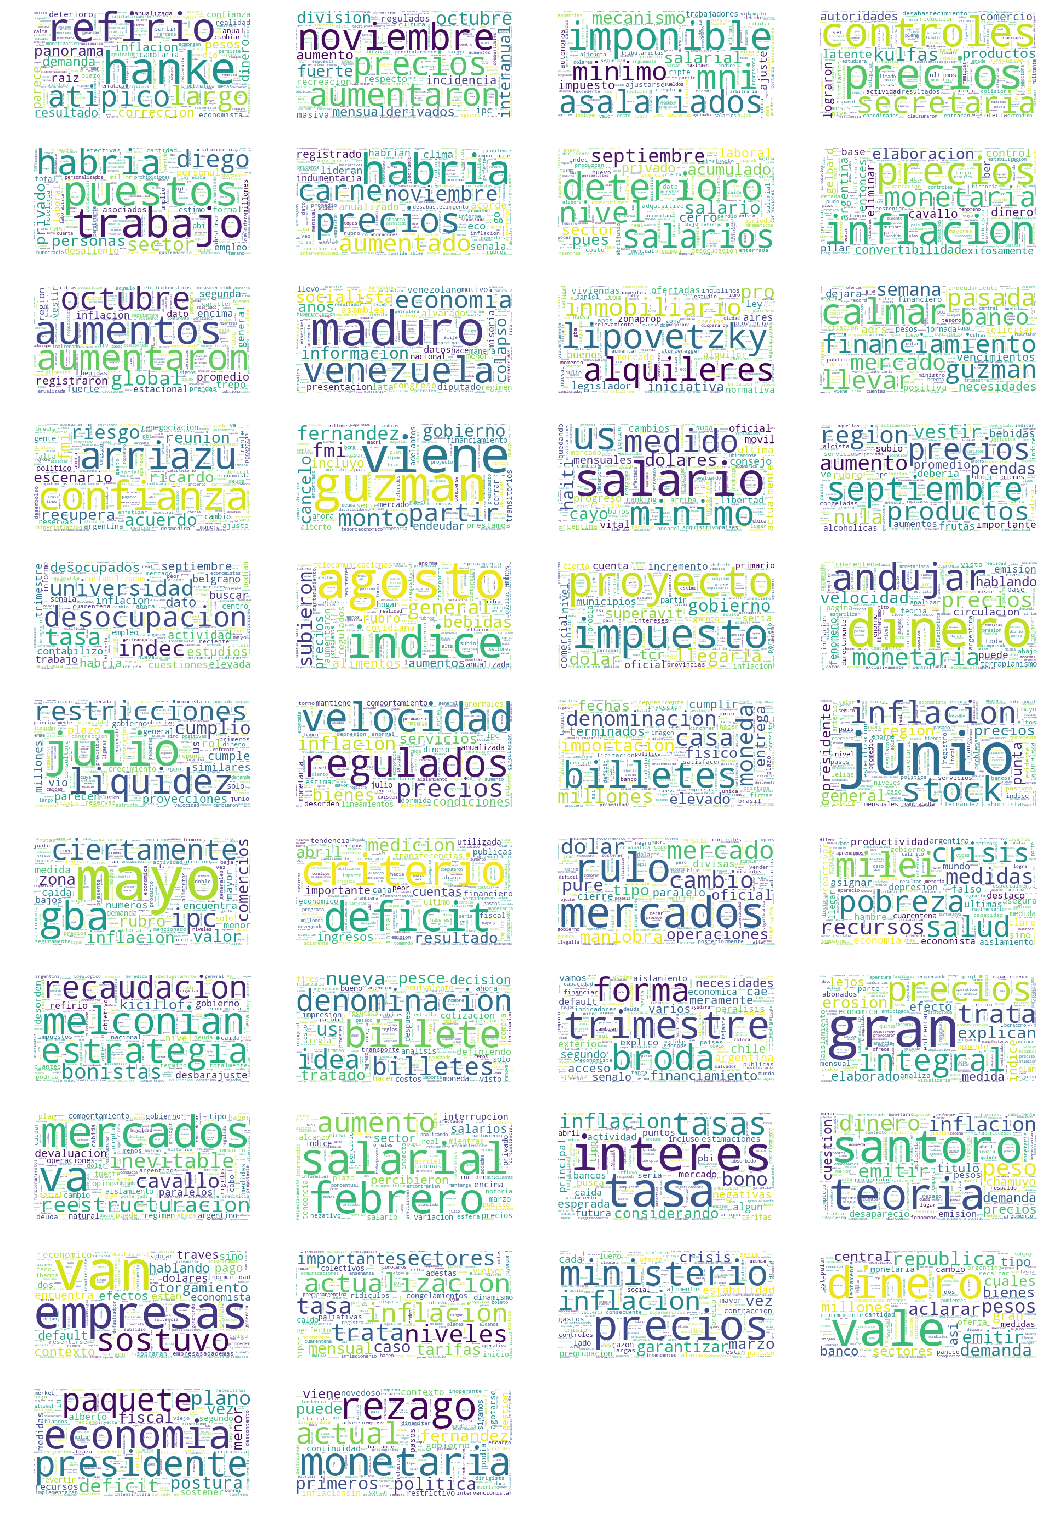

In [90]:
for row in range(tfidf_inf_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_inf_df.iloc[row].sort_values())
    plt.subplot(12, 4, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

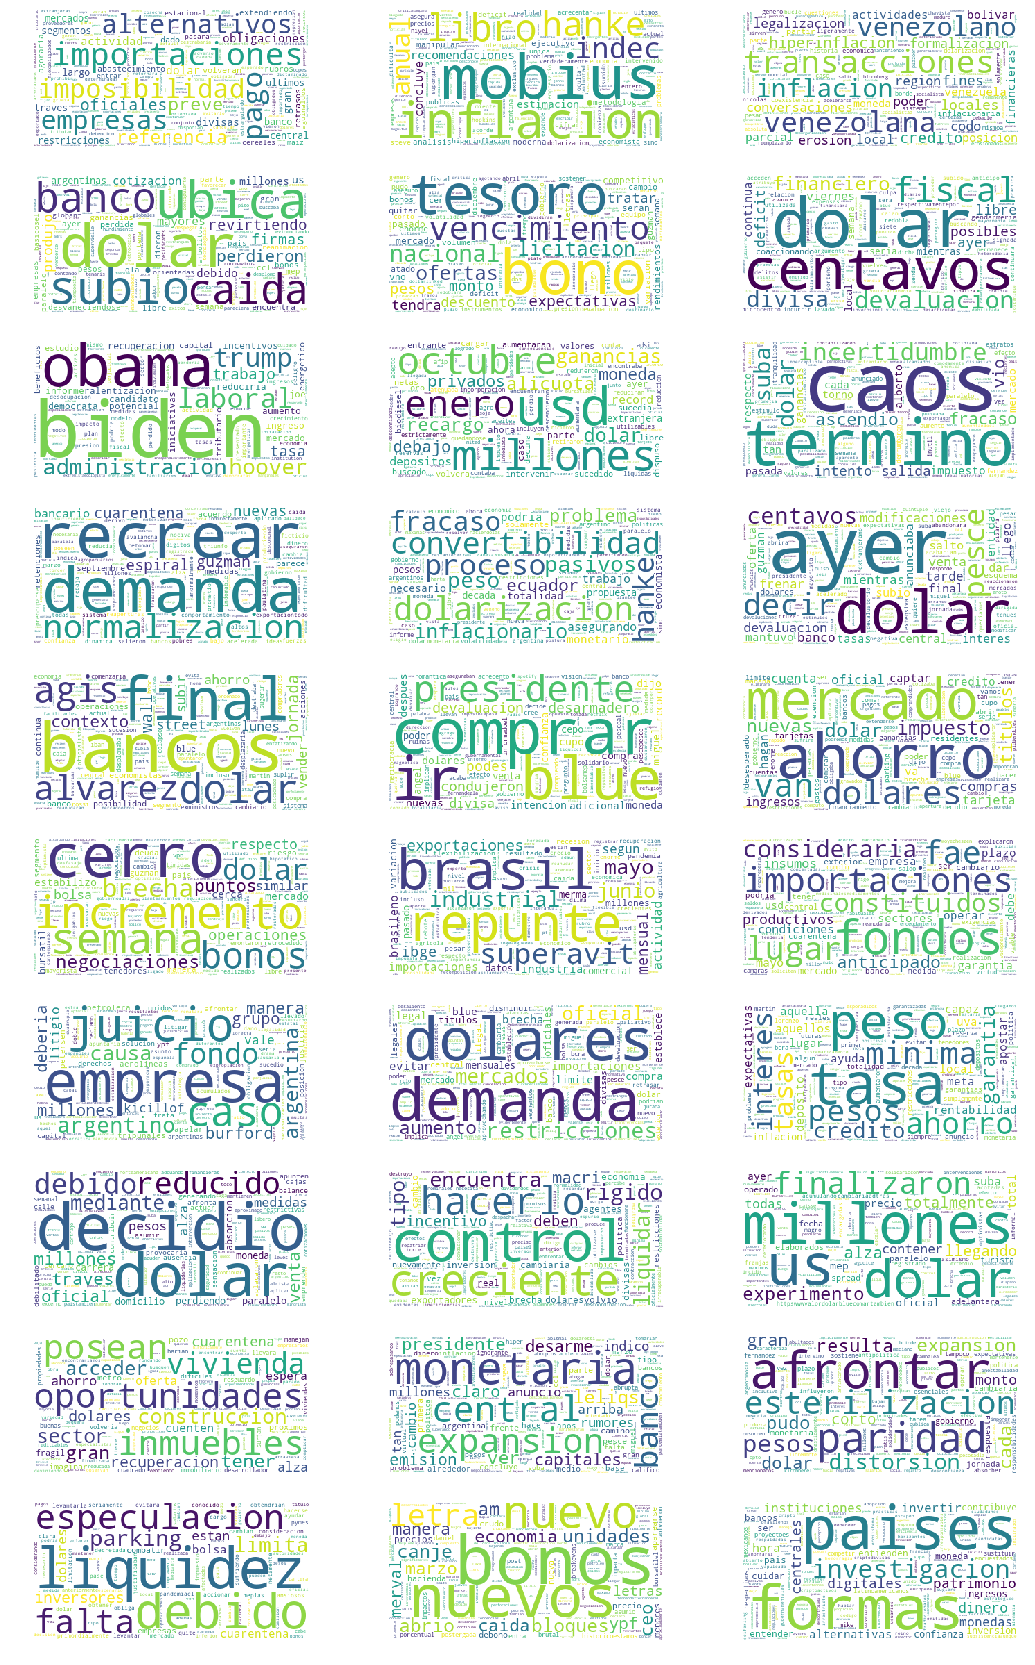

In [91]:
for row in range(tfidf_ex_df.shape[0]):
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(tfidf_ex_df.iloc[row].sort_values())
    plt.subplot(10, 3, row + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show() 

#### Tf IDf per topic
See top rated terms amid documents of the same topic

In [92]:
plt.rcParams['figure.figsize'] = [10.4 , 8.8]

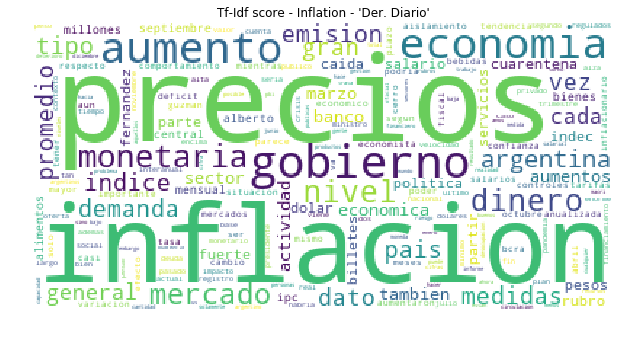

In [93]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_inf_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.title("Tf-Idf score - Inflation - 'Der. Diario'")
plt.axis('off')
plt.show()

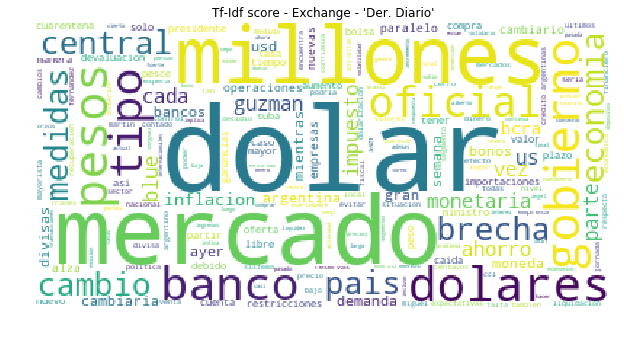

In [94]:
cloud = WordCloud(background_color='white')
cloud.generate_from_frequencies(tfidf_ex_df.sum(axis=0).sort_values())
plt.imshow(cloud)
plt.title("Tf-Idf score - Exchange - 'Der. Diario'")
plt.axis('off')
plt.show()

## Combinations

In [95]:
tfidf = TfidfTransformer().fit_transform(tokens.drop('topics', axis=1))
tfidf_df = pd.DataFrame(tfidf.todense(), columns = tokens.drop('topics', axis=1).columns)

In [96]:
tfidf_df.index = ['inf'+ str(i) for i in range(len(tokens[tokens.topics == 'inflation']))] + ['ex'+ str(i) for i in range(len(tokens[tokens.topics == 'exchange']))]

In [97]:
n_inf_news = len(tokens[tokens.topics == 'inflation'])

### SVD

In [98]:
from sklearn.decomposition import TruncatedSVD

In [99]:
svd = TruncatedSVD(n_components = 2) # n_components = Desired dimensionality of output data. Must be strictly less than the number of features.
p = svd.fit_transform(tfidf_df)
P = np.around(p,3)

#### Plot

matplotlib

In [100]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]

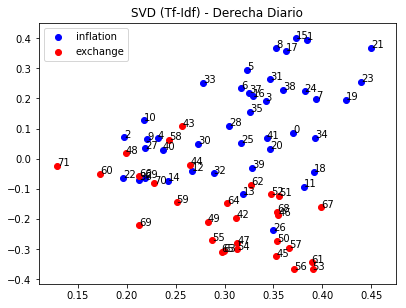

In [101]:
fig, ax = plt.subplots()

ax.scatter(P[:n_inf_news, 0], P[:n_inf_news, 1], c='b')
ax.scatter(P[n_inf_news:, 0], P[n_inf_news:, 1], c='r')

for row in range(len(P)):
    ax.annotate(row, (P[row, 0], P[row, 1]) )

plt.title('SVD (Tf-Idf) - Derecha Diario')
plt.legend(['inflation', 'exchange'])
plt.show()

plotly

In [102]:
comp1, comp2 = svd.components_

In [103]:
indices1 = np.argsort(comp1)

In [104]:
indices1 = indices1[::-1]
indices1[:20]

array([2805, 3991, 1786, 2495, 3314, 3398,  579, 1828, 5034, 3876,  622,
       3351, 1718, 3510, 3279, 1787,  868,  475,  777, 3678])

In [105]:
indices2 = np.argsort(comp2)
indices2 = indices2[::-1]

In [106]:
indices2[:20]

array([3991, 2805,  579, 2780,  580, 1401,  309, 4137,  577, 4620, 3304,
       2946,  646, 4436, 3510, 2461, 2767,  655,  404, 4724])

In [107]:
dim1 = np.array(tfidf_df.columns)[indices1]
print(f'Dimensión 1:\n{dim1[:50]}')

Dimensión 1:
['inflacion' 'precios' 'dolar' 'gobierno' 'mercado' 'monetaria' 'aumento'
 'economia' 'tipo' 'pesos' 'banco' 'millones' 'dinero' 'nivel' 'medidas'
 'dolares' 'central' 'argentina' 'cambio' 'pais' 'demanda' 'oficial' 'vez'
 'gran' 'cada' 'guzman' 'brecha' 'emision' 'parte' 'cuarentena' 'dato'
 'bcra' 'indice' 'marzo' 'politica' 'caida' 'actividad' 'mientras'
 'general' 'promedio' 'economica' 'tambien' 'us' 'partir' 'tasa' 'sector'
 'presidente' 'fernandez' 'mayor' 'impuesto']


In [108]:
dim2 = np.array(tfidf_df.columns)[indices2]
print(f'Dimensión 2:\n{dim2[:50]}')

Dimensión 2:
['precios' 'inflacion' 'aumento' 'indice' 'aumentos' 'dato' 'alimentos'
 'promedio' 'aumentaron' 'rubro' 'mensual' 'ipc' 'bebidas' 'regulados'
 'nivel' 'general' 'indec' 'bienes' 'anualizada' 'servicios' 'septiembre'
 'variacion' 'interanual' 'tarifas' 'vestir' 'prendas' 'actividad'
 'region' 'velocidad' 'dinero' 'noviembre' 'encima' 'incidencia' 'octubre'
 'tendencia' 'registro' 'registraron' 'marzo' 'productos' 'practicamente'
 'rubros' 'calzado' 'cifra' 'comportamiento' 'buenos' 'salarial'
 'importante' 'fuerte' 'cuarentena' 'cifras']


#### Outliers

In [109]:
tokens_inf = tokens[tokens.topics == 'inflation'].drop('topics', axis=1)

In [110]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))
data_inf = data[:n_inf_news]

In [111]:
tfidf_inf = tfidf_df[:n_inf_news]

The Y axis defines the frontier between topics. There are 8 articles apparently mislabeled.

In [112]:
outlier_mask = P[:n_inf_news, 1] < 0
outlier_mask.sum()

11

In [113]:
for i in range(outlier_mask.sum()):
    print(f'HEADLINE:\n{data_inf[outlier_mask].iloc[i].title}')
    print(f'LEAD:\n{data_inf[outlier_mask].iloc[i].lead}')
    print(f'COUNT:\n{tokens_inf[outlier_mask].iloc[i].sort_values(ascending=False)[:10].to_dict()}')
    print(f'TFIDF SCORE:\n{tfidf_inf[outlier_mask].iloc[i].sort_values(ascending=False)[:10].to_dict()}')    
    print('-----')

HEADLINE:
El Plan Guzmán para llegar a fin de año: más deuda y menos emisión monetaria del Banco Central para financiar el Tesoro
LEAD:
Guzmán lanzó un quinto paquete de medidas orientadas a tranquilizar la volatilidad en el mercado cambiario y reducir la brecha entre el segmento oficial y el paralelo. En respuesta, repuntaron las acciones argentinas en Wall Street y en la bolsa local.
COUNT:
{'guzman': 5, 'mercado': 5, 'banco': 5, 'pesos': 4, 'financiamiento': 4, 'llevar': 3, 'financiero': 3, 'ministro': 3, 'necesidades': 3, 'pasada': 3}
TFIDF SCORE:
{'calmar': 0.15054068724227207, 'financiamiento': 0.14457722053954672, 'necesidades': 0.13678016958602415, 'guzman': 0.12653851843996952, 'positiva': 0.12534247930502035, 'solicitar': 0.12534247930502035, 'dejara': 0.12534247930502035, 'vencimientos': 0.12534247930502035, 'llevar': 0.12219343306090798, 'pasada': 0.11473712990029336}
-----
HEADLINE:
Alerta: el reconocido economista Ricardo Arriazu afirma que una hiperinflación es "muy posi

### PCA

In [114]:
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components=2).fit(tfidf_df)
pca_tfidf = pca.transform(tfidf_df)

#### Plot

matplotlib

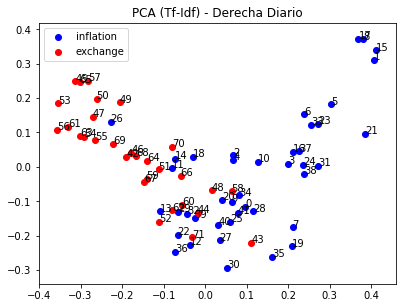

In [116]:
fig, ax = plt.subplots()

ax.scatter(pca_tfidf[:n_inf_news, 0], pca_tfidf[:n_inf_news, 1], c='b')
ax.scatter(pca_tfidf[n_inf_news:, 0], pca_tfidf[n_inf_news:, 1], c='r')

for row in range(len(pca_tfidf)):
    ax.annotate(row, (pca_tfidf[row, 0], pca_tfidf[row, 1]) )

plt.title('PCA (Tf-Idf) - Derecha Diario')
plt.legend(['inflation', 'exchange'])
plt.show()

plotly

Both linear combinations classify the same documents as outliers from their supposed category. Although these deal with the same topic (inflation), they are more focused on the monetary explaination of the phenomenon. Terms like 'us', 'billetes', 'dolares' or 'fmi' have a high tf-idf score for the inflation corpus. Since they were not miss labeled, we decide not to remove them from the database.